In [238]:
import pandas as pd
import seaborn as sns
import warnings

In [239]:
warnings.filterwarnings('ignore')

# Unsupervised Learning

In [240]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Subset & Data Scaling

In [241]:
from sklearn.preprocessing import StandardScaler

In [242]:
df_subset = df[['sepal_length', 'petal_length']]

In [243]:
ss = StandardScaler()

In [244]:
x_scaled = ss.fit_transform(df_subset)

# K-Means Clustering

In [245]:
from sklearn.cluster import KMeans


model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [246]:
labels = model_kmeans.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 2 1 1 0 2 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 1 1]


## Buat Cross-Tab untuk membandingkan antar cluster

In [247]:
# Buat data frame dengan label dan species dari iris sebagai kolom
df_kmeans = pd.DataFrame({'labels': labels, 'species': df.species})

In [248]:
# Buat Cross-Tab
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['species'])
print(ct1)

species  setosa  versicolor  virginica
labels                                
0            50           4          0
1             0          37         16
2             0           9         34


## Visualisasi Centroid

In [249]:
import matplotlib.pyplot as plt

In [250]:
plt.style.use('ggplot')

In [251]:
# Untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [252]:
#Menampung koordinat dari semua centroid 
centroids = model_kmeans.cluster_centers_

In [253]:
# pisahkan centroid koordinat x dan koordinat y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

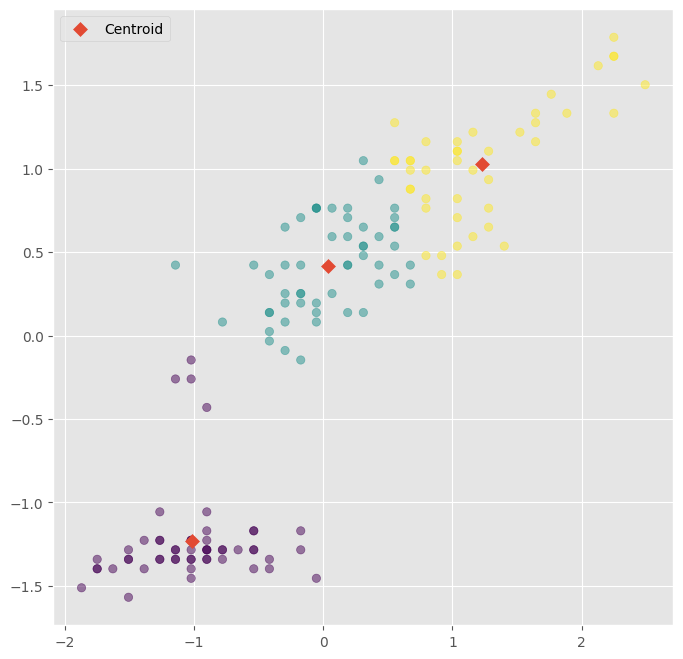

In [254]:
# Visualisasi Cluster 
plt.figure(figsize=(8,8))

# titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha = 0.5, c = labels)

# titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="D", s = 50)

# Beri label
plt.xlabel = ("sepal_length")
plt.ylabel = ("petal_length")

plt.legend()
plt.show()

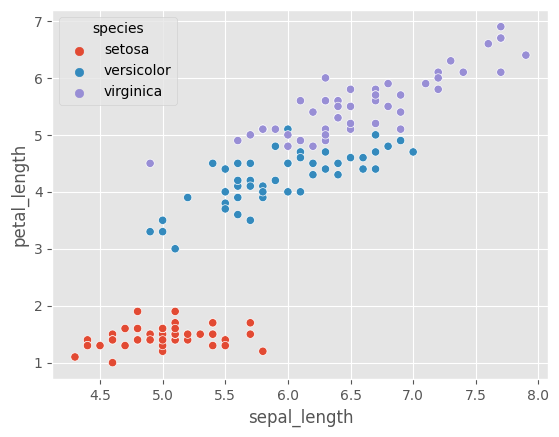

In [255]:
# labels Aktual
df_aktual = df[["sepal_length", "petal_length", "species"]]
sns.scatterplot(x = "sepal_length", y = "petal_length", data = df_aktual, hue = "species" )
plt.show()

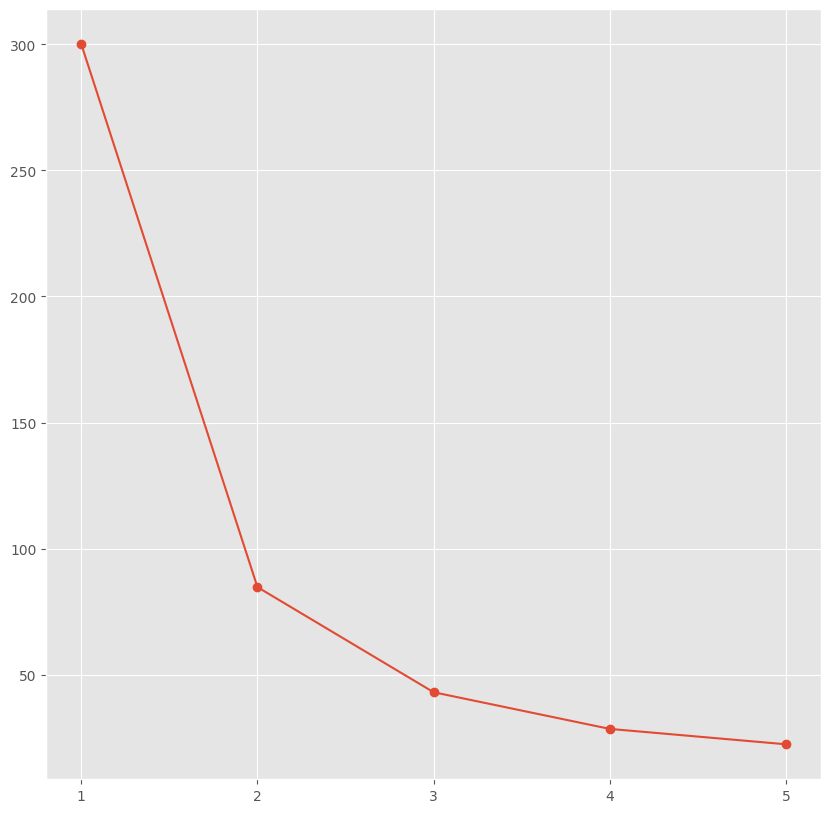

In [256]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xticks(ks)
plt.show()

## Clustering Hierarki (Hierarchical)

In [257]:
from sklearn.cluster import AgglomerativeClustering

In [258]:
hc_cluster = AgglomerativeClustering(n_clusters=3)

In [259]:
agg_cluster = hc_cluster.fit_predict(x_scaled)

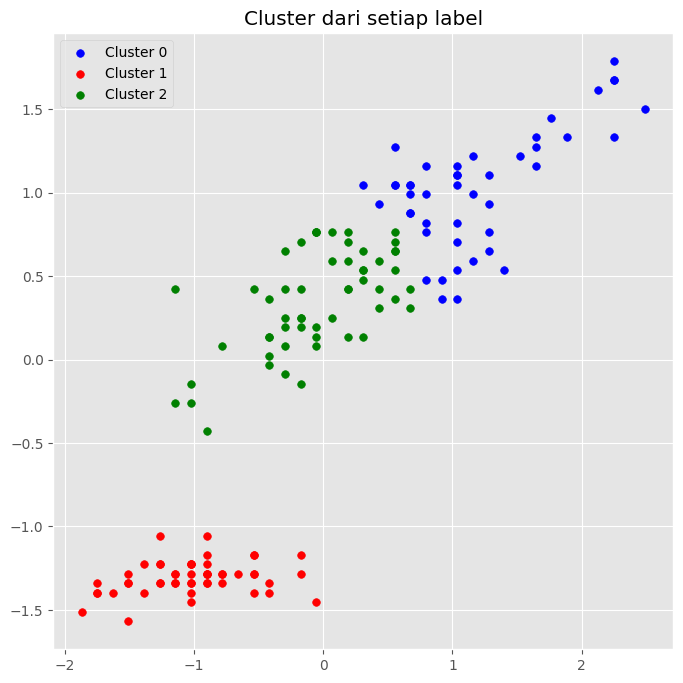

In [260]:
plt.figure(figsize=(8,8))

plt.scatter(x_scaled[agg_cluster == 0, 0], x_scaled[agg_cluster == 0, 1],  c = 'blue', s = 30, label = 'Cluster 0')
plt.scatter(x_scaled[agg_cluster == 1, 0], x_scaled[agg_cluster == 1, 1],  c = 'red', s = 30, label = 'Cluster 1')
plt.scatter(x_scaled[agg_cluster == 2, 0], x_scaled[agg_cluster == 2, 1],  c = 'green', s = 30, label = 'Cluster 2')

plt.title("Cluster dari setiap label")
plt.legend()
plt.show()

# Dendrogram

In [261]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [262]:
ananta = linkage(x_scaled, method= "ward")

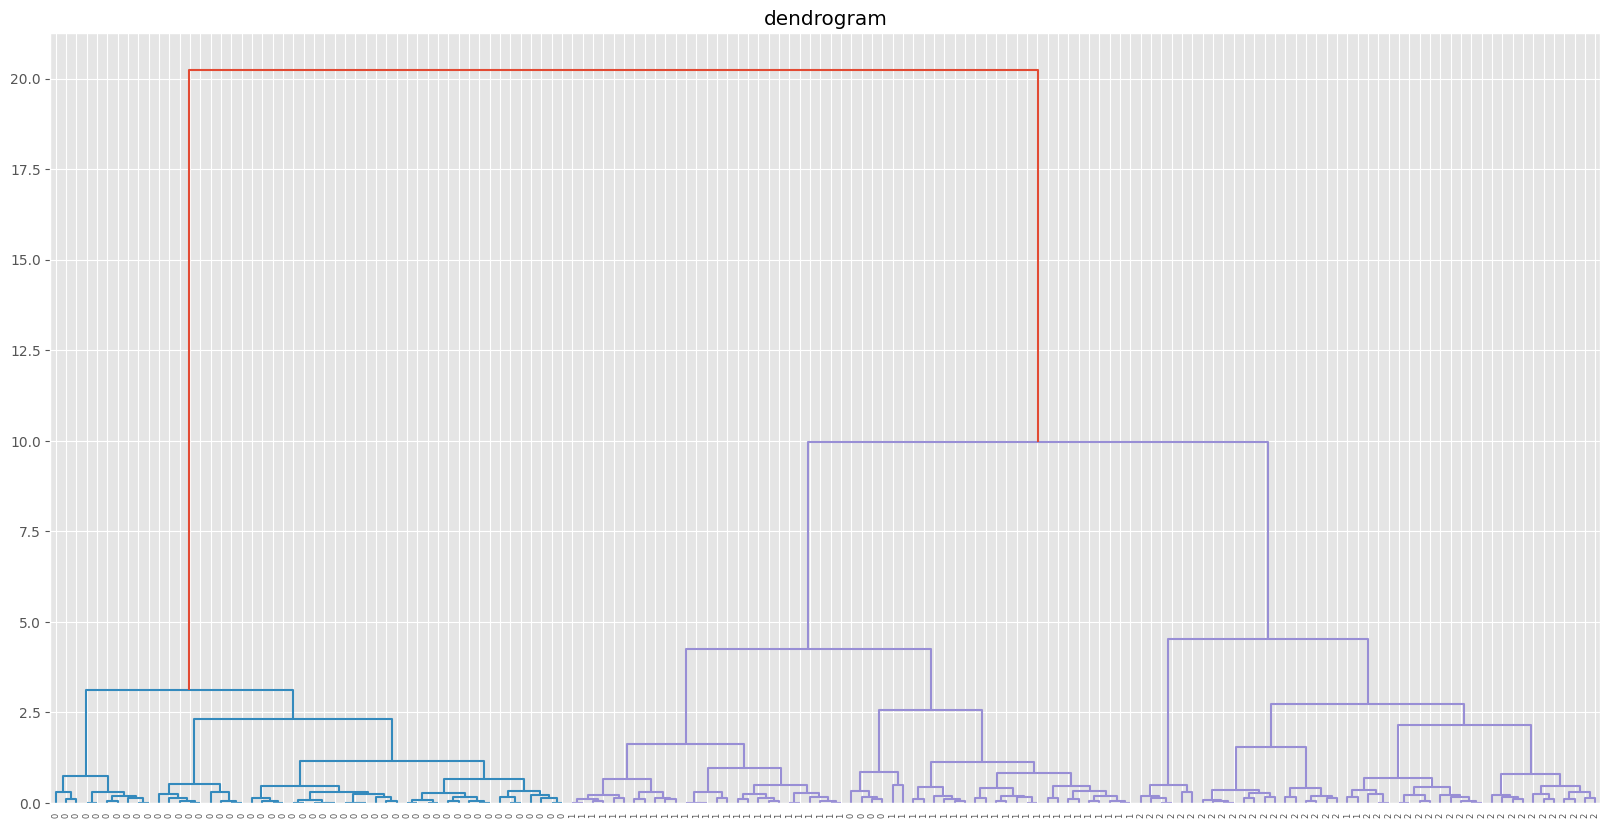

In [268]:
plt.figure(figsize= (20,10))
dendrogram (ananta, leaf_rotation= 90, labels = labels, leaf_font_size=6)
plt.title("dendrogram")
plt.show()